#3. Repeat the question 2 on the denoisening autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [3]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img) #Undercomplete Encoding
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

In [4]:
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [5]:
from keras.datasets import mnist, fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:6000]
x_test = x_test[:1000]

#Converting into float & Scaling Data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


#Setting Up data from 28*28 to 784 for the width & height of image
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


4422102/4422102 [==============================] - 0s 0us/step


In [6]:
#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [7]:
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/10
24/24 [==============================] - 10s 51ms/step - loss: 0.6267 - accuracy: 0.0015 - val_loss: 0.5357 - val_accuracy: 0.0030
Epoch 2/10
24/24 [==============================] - 1s 28ms/step - loss: 0.4912 - accuracy: 0.0010 - val_loss: 0.4457 - val_accuracy: 0.0060
Epoch 3/10
24/24 [==============================] - 1s 24ms/step - loss: 0.4279 - accuracy: 0.0053 - val_loss: 0.4054 - val_accuracy: 0.0020
Epoch 4/10
24/24 [==============================] - 1s 22ms/step - loss: 0.4012 - accuracy: 0.0063 - val_loss: 0.3878 - val_accuracy: 0.0080
Epoch 5/10
24/24 [==============================] - 0s 21ms/step - loss: 0.3872 - accuracy: 0.0078 - val_loss: 0.3756 - val_accuracy: 0.0070
Epoch 6/10
24/24 [==============================] - 0s 20ms/step - loss: 0.3766 - accuracy: 0.0073 - val_loss: 0.3654 - val_accuracy: 0.0070
Epoch 7/10
24/24 [==============================] - 0s 16ms/step - loss: 0.3674 - accuracy: 0.0077 - val_loss: 0.3563 - val_accuracy: 0.0060
Epoch 8/10
2

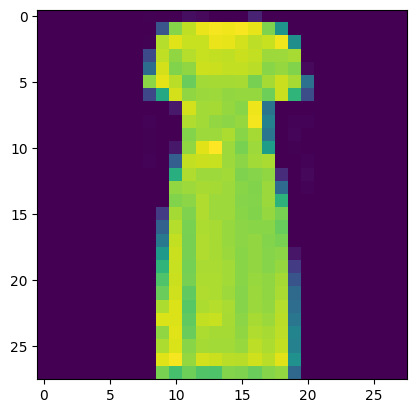

In [8]:
#Before applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train[50].reshape(28,28))
plt.show()

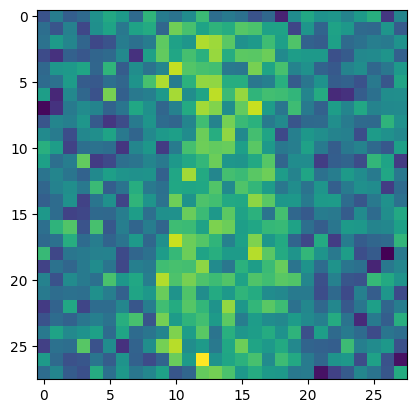

In [9]:
#After Applying Noise to data
from matplotlib import pyplot as plt
plt.imshow(x_train_noisy[50].reshape(28,28))
plt.show()

In [10]:
#predicting on the test data
prediction = autoencoder.predict(x_test_noisy) #prediction

32/32 [==============================] - 1s 7ms/step


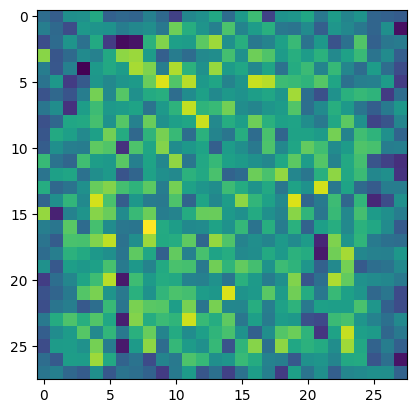

In [11]:
#Input Image After Noise to be predicted
from matplotlib import pyplot as plt
plt.imshow(x_test_noisy[50].reshape(28,28))
plt.show()

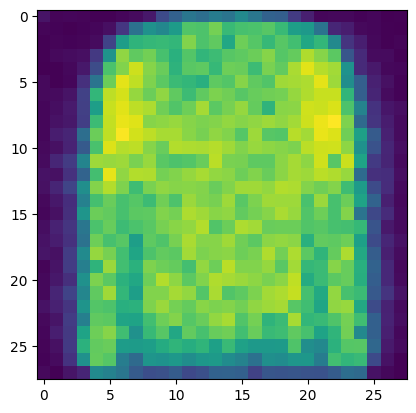

In [12]:
#reconstructed Image
from matplotlib import pyplot as plt
plt.imshow(prediction[50].reshape(28,28))
plt.show()

#4. plot loss and accuracy using the history object

In [13]:
autoencoder.metrics_names

['loss', 'accuracy']

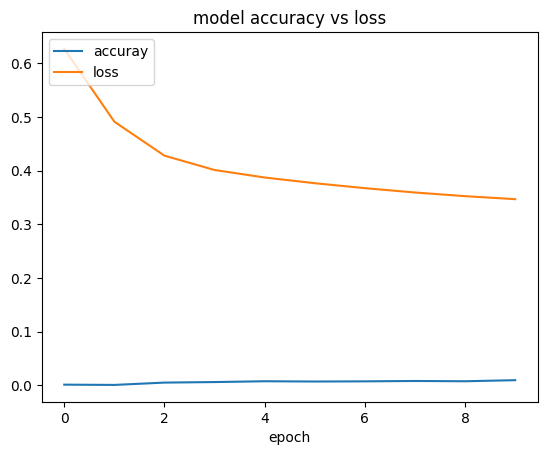

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy vs loss')
plt.xlabel('epoch')
plt.legend(['accuray','loss'], loc='upper left')
plt.show()